<a href="https://colab.research.google.com/github/July-to-me/Smart_Lights_ML_Data_Analysis/blob/main/Smart_lights_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import calendar
import datetime, time
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
import seaborn as sns
import kmodes
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as scipy
import random
import timeit
from sklearn import neighbors, datasets

In [ ]:
from kmodes.kmodes import KModes

In [ ]:
pip install kmodes

I will only have 2 Blocks as I want to see if I can predict which block belongs to which

In [ ]:


block_8_data = pd.read_csv("/content/block_8.csv")

block_104_data = pd.read_csv("/content/block_104.csv")

Getting the specific blocks

In [ ]:
block_104_data = block_104_data.replace('Null', np.NaN)
replace = block_104_data.fillna(block_104_data.mode().iloc[0], inplace=True)

In [ ]:
block_8_data = block_8_data.replace('Null', np.NaN)
replace = block_8_data.fillna(block_8_data.mode().iloc[0], inplace=True)

Doing conversions here 

In [ ]:
block_104_data['energy(kWh/hh)'] = pd.to_numeric(block_104_data['energy(kWh/hh)'], errors='coerce')

In [ ]:
block_8_data['energy(kWh/hh)'] = pd.to_numeric(block_8_data['energy(kWh/hh)'], errors='coerce')

In [ ]:
df104 = block_104_data[block_104_data["LCLid"] == "MAC000090"]
df104.reset_index(drop=True, inplace=True)

In [ ]:
df8 = block_8_data[block_8_data["LCLid"] == "MAC000079"]
df8.reset_index(drop=True, inplace=True)

In [ ]:
for i in range(df8.shape[0]):
    df8.loc[i,'datetime'] = datetime.datetime.strptime(df8.loc[i,'tstp'].replace('.0000000', ''), '%Y-%m-%d %H:%M:%S')
    df8.loc[i,'date'] = df8.loc[i,'datetime'].date()
    df8.loc[i,'month'] = df8.loc[i,'datetime'].strftime("%B")
    df8.loc[i,'day_of_month'] = df8.loc[i,'datetime'].strftime("%d")
    df8.loc[i,'time'] = df8.loc[i,'datetime'].strftime('%X')
    df8.loc[i,'weekday'] = df8.loc[i,'datetime'].strftime('%A')
    time = df8.datetime[i] - datetime.datetime.combine(df8.date[i], datetime.datetime.min.time())

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1684: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [ ]:
for i in range(df104.shape[0]):
    df104.loc[i,'datetime'] = datetime.datetime.strptime(df104.loc[i,'tstp'].replace('.0000000', ''), '%Y-%m-%d %H:%M:%S')
    df104.loc[i,'date'] = df104.loc[i,'datetime'].date()
    df104.loc[i,'month'] = df104.loc[i,'datetime'].strftime("%B")
    df104.loc[i,'day_of_month'] = df104.loc[i,'datetime'].strftime("%d")
    df104.loc[i,'time'] = df104.loc[i,'datetime'].strftime('%X')
    df104.loc[i,'weekday'] = df104.loc[i,'datetime'].strftime('%A')
    time = df104.datetime[i] - datetime.datetime.combine(df104.date[i], datetime.datetime.min.time())

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1684: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [ ]:
df104.loc[:,'weekday'] = pd.Categorical(df104['weekday'], categories= ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday', 'Sunday'], ordered=True)
df104.loc[:,'month'] = pd.Categorical(df104['month'], categories=calendar.month_name[1:], ordered=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [ ]:
df8.loc[:,'weekday'] = pd.Categorical(df8['weekday'], categories= ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday', 'Sunday'], ordered=True)
df8.loc[:,'month'] = pd.Categorical(df8['month'], categories=calendar.month_name[1:], ordered=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


Dropping data that will be irrelevant

In [ ]:
df8.drop('tstp', inplace=True, axis=1)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
df104.drop('tstp', inplace=True, axis=1)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
 ## df8.drop('datetime', inplace=True, axis=1)

In [ ]:
## df104.drop('dateime', inplace=True, axis=1)

In [ ]:
## df8.drop('date', inplace=True, axis=1)

In [ ]:
## df104.drop('date', inplace=True, axis=1)

In [ ]:
## df104.drop('datetime', inplace=True, axis=1)

In [ ]:
df104.head()

,LCLid,energy(kWh/hh),month,day_of_month,time,weekday
0,MAC000090,0.247,December,12,10:00:00,Monday
1,MAC000090,0.068,December,12,10:30:00,Monday
2,MAC000090,0.107,December,12,11:00:00,Monday
3,MAC000090,0.098,December,12,11:30:00,Monday
4,MAC000090,0.095,December,12,12:00:00,Monday


In [ ]:
df8.head()

,LCLid,energy(kWh/hh),month,day_of_month,time,weekday
0,MAC000079,1.387,December,10,11:00:00,Saturday
1,MAC000079,2.733,December,10,11:30:00,Saturday
2,MAC000079,2.872,December,10,12:00:00,Saturday
3,MAC000079,1.697,December,10,12:30:00,Saturday
4,MAC000079,1.238,December,10,13:00:00,Saturday


Seeing the Attributes of the data

In [ ]:
print(df8.dtypes)

LCLid               object
energy(kWh/hh)     float64
month             category
day_of_month        object
time                object
weekday           category
dtype: object


We want to change the following into countable variables for logistic regression
    day_of_month
    time
Will replace day_of_month as interger

In [ ]:
df8['day_of_month'] = pd.to_numeric(df8['day_of_month'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df104['day_of_month'] = pd.to_numeric(df104['day_of_month'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
print(df8.dtypes)

LCLid               object
energy(kWh/hh)     float64
month             category
day_of_month         int64
time                object
weekday           category
dtype: object


Reading the CSV file of Acorn group

In [ ]:
acorn_data = pd.read_csv('/content/informations_households.csv')

acorn_data

,LCLid,stdorToU,Acorn,Acorn_grouped,file
0,MAC005492,ToU,ACORN-,ACORN-,block_0
1,MAC001074,ToU,ACORN-,ACORN-,block_0
2,MAC000002,Std,ACORN-A,Affluent,block_0
3,MAC003613,Std,ACORN-A,Affluent,block_0
4,MAC003597,Std,ACORN-A,Affluent,block_0
...,...,...,...,...,...
5561,MAC002056,Std,ACORN-U,ACORN-U,block_111
5562,MAC004587,Std,ACORN-U,ACORN-U,block_111
5563,MAC004828,Std,ACORN-U,ACORN-U,block_111
5564,MAC001704,ToU,ACORN-U,ACORN-U,block_111


Getting the Acorn group

In [ ]:
acorn_data_8 = acorn_data.loc[acorn_data['LCLid'] == 'MAC000079']
acorn_data_104 = acorn_data.loc[acorn_data['LCLid'] == 'MAC000090']

In [ ]:
df8_merged = pd.merge(df8,acorn_data_8, on = 'LCLid', how = 'left')

In [ ]:
df104_merged = pd.merge(df104,acorn_data_104, on = 'LCLid', how = 'left')

In [ ]:
df8_merged

,LCLid,energy(kWh/hh),month,day_of_month,time,weekday,stdorToU,Acorn,Acorn_grouped,file
0,MAC000079,1.387,December,10,11:00:00,Saturday,Std,ACORN-D,Affluent,block_8
1,MAC000079,2.733,December,10,11:30:00,Saturday,Std,ACORN-D,Affluent,block_8
2,MAC000079,2.872,December,10,12:00:00,Saturday,Std,ACORN-D,Affluent,block_8
3,MAC000079,1.697,December,10,12:30:00,Saturday,Std,ACORN-D,Affluent,block_8
4,MAC000079,1.238,December,10,13:00:00,Saturday,Std,ACORN-D,Affluent,block_8
...,...,...,...,...,...,...,...,...,...,...
38131,MAC000079,1.555,February,27,22:00:00,Thursday,Std,ACORN-D,Affluent,block_8
38132,MAC000079,0.921,February,27,22:30:00,Thursday,Std,ACORN-D,Affluent,block_8
38133,MAC000079,0.437,February,27,23:00:00,Thursday,Std,ACORN-D,Affluent,block_8
38134,MAC000079,0.430,February,27,23:30:00,Thursday,Std,ACORN-D,Affluent,block_8


In [ ]:
print(df8_merged.dtypes)

LCLid               object
energy(kWh/hh)     float64
month             category
day_of_month         int64
time                object
weekday           category
stdorToU            object
Acorn               object
Acorn_grouped       object
file                object
dtype: object


Dropping more items

In [ ]:
df8_merged.drop('stdorToU', inplace=True, axis=1)

In [ ]:
df104_merged.drop('stdorToU', inplace=True, axis=1)

In [ ]:
df8_merged.drop('Acorn', inplace=True, axis=1)

In [ ]:
df104_merged.drop('Acorn', inplace=True, axis=1)

In [ ]:
df8_merged.drop('file', inplace=True, axis=1)

In [ ]:
df104_merged.drop('file', inplace=True, axis=1)

In [ ]:
df8_merged

,LCLid,energy(kWh/hh),month,day_of_month,time,weekday,Acorn_grouped
0,MAC000079,1.387,December,10,11:00:00,Saturday,Affluent
1,MAC000079,2.733,December,10,11:30:00,Saturday,Affluent
2,MAC000079,2.872,December,10,12:00:00,Saturday,Affluent
3,MAC000079,1.697,December,10,12:30:00,Saturday,Affluent
4,MAC000079,1.238,December,10,13:00:00,Saturday,Affluent
...,...,...,...,...,...,...,...
38131,MAC000079,1.555,February,27,22:00:00,Thursday,Affluent
38132,MAC000079,0.921,February,27,22:30:00,Thursday,Affluent
38133,MAC000079,0.437,February,27,23:00:00,Thursday,Affluent
38134,MAC000079,0.430,February,27,23:30:00,Thursday,Affluent


In [ ]:
print(df8_merged.dtypes)

LCLid               object
energy(kWh/hh)     float64
month             category
day_of_month         int64
time                object
weekday           category
Acorn_grouped       object
dtype: object


Converting into categorical 

In [ ]:
df8_merged['Acorn_grouped'] = pd.Categorical(df8_merged.Acorn_grouped)

In [ ]:
df104_merged['Acorn_grouped'] = pd.Categorical(df104_merged.Acorn_grouped)

In [ ]:
print(df8_merged.dtypes)

LCLid               object
energy(kWh/hh)     float64
month             category
day_of_month         int64
time                object
weekday           category
Acorn_grouped     category
dtype: object


Merging both datasets together

In [ ]:
df_main = df8_merged.append(df104_merged)


In [ ]:
df_main.drop('LCLid', inplace=True, axis=1)

In [ ]:
df_main.drop('time', inplace=True, axis=1)

In [ ]:
display(df_main)

,energy(kWh/hh),month,day_of_month,weekday,Acorn_grouped
0,1.387,December,10,Saturday,Affluent
1,2.733,December,10,Saturday,Affluent
2,2.872,December,10,Saturday,Affluent
3,1.697,December,10,Saturday,Affluent
4,1.238,December,10,Saturday,Affluent
...,...,...,...,...,...
38803,0.128,February,27,Thursday,Adversity
38804,0.170,February,27,Thursday,Adversity
38805,0.126,February,27,Thursday,Adversity
38806,0.114,February,27,Thursday,Adversity


In [ ]:
print(df_main.dtypes)

Cluster           int64
energy(kWh/hh)    int64
month             int64
day_of_month      int64
weekday           int64
Acorn_grouped     int64
dtype: object


We can make the models

In [ ]:
#Splitting Data into X and y
X = df_main.drop('Acorn_grouped', axis = 1)

y = df_main['Acorn_grouped']

In [ ]:
from sklearn.model_selection import train_test_split

#Splitting the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=48)

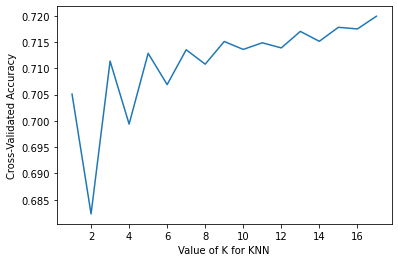

In [ ]:
# import k-folder
from sklearn.model_selection import cross_val_score

# choose k between 1 to 18
k_range = range(1, 18)
k_scores = []
# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
for k in k_range:
    knn = neighbors.KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=5, scoring='accuracy')
    k_scores.append(scores.mean())
# plot to see clearly
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

In [ ]:
start = timeit.default_timer()

#knn
# build KNN model and choose n_neighbors = 3
knn = neighbors.KNeighborsClassifier(n_neighbors = 3)
# train the model
knn.fit(X_train, y_train)
# get the predict value from X_test
y_pred = knn.predict(X_test)

knn_accuracy = knn.score(X_test, y_test)
# print the score
print('accuracy: ', knn_accuracy)

stop = timeit.default_timer()
execution_time_knn = stop - start
execution_time_knn

accuracy:  0.7443335412767728


1.3179791459988337

Found out about Kmodes and knew that this is applicable to this version.

Will make a copy of data just in case if anything bad happens 

In [ ]:
df_main_copy = df_main.copy()

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df_main = df_main.apply(le.fit_transform)
df_main.head()

,Cluster,energy(kWh/hh),month,day_of_month,weekday,Acorn_grouped
0,1,1354,2,9,2,1
1,1,2204,2,9,2,1
2,1,2234,2,9,2,1
3,1,1654,2,9,2,1
4,1,1205,2,9,2,1


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [ ]:
df_main_copy.head()

,energy(kWh/hh),month,day_of_month,weekday,Acorn_grouped
0,1.387,December,10,Saturday,Affluent
1,2.733,December,10,Saturday,Affluent
2,2.872,December,10,Saturday,Affluent
3,1.697,December,10,Saturday,Affluent
4,1.238,December,10,Saturday,Affluent


In [ ]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.88


In [ ]:
start = timeit.default_timer()

#random forest
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators = 100)

param_grid = {
                 'n_estimators': [5, 10, 15, 20,30,50,70,100],
                 'max_depth': [2, 3, 5, 7, 9]
             }

from sklearn.model_selection import GridSearchCV

grid_clf = GridSearchCV(clf, param_grid, cv=10)
grid_clf.fit(X_train, y_train)

# performing predictions on the test dataset
y_pred = grid_clf.predict(X_test)

# metrics are used to find accuracy or error
from sklearn import metrics
print()

# using metrics module for accuracy calculation
rand_forest_accuracy = metrics.accuracy_score(y_test, y_pred)
print("ACCURACY OF THE MODEL: ", rand_forest_accuracy)



ACCURACY OF THE MODEL:  0.9316842834863975


Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 322739.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 322739.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 322739.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 322739.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 322739.0
Best run was number 1
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 2312, cost: 284341.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 228, cost: 284443.0
Init: initializing centroids
Init: initializing clusters
Starti

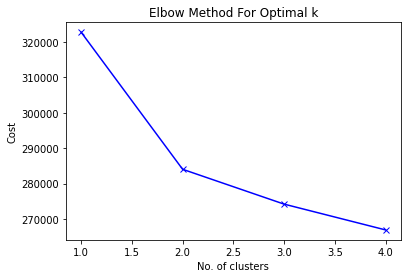

In [ ]:
## Kmodes clustering techinque

# Elbow curve to find optimal K
cost = []
K = range(1,5)
for num_clusters in list(K):
    kmode = KModes(n_clusters=num_clusters, init = "random", n_init = 5, verbose=1)
    kmode.fit_predict(df_main)
    cost.append(kmode.cost_)
    
plt.plot(K, cost, 'bx-')
plt.xlabel('No. of clusters')
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal k')
plt.show()

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 322739.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 322739.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 322739.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 322739.0
Best run was number 1
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 2503, cost: 284558.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 155, cost: 284950.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 152, cost: 284948.0
Init: initializing centroids
Init: initializing clusters
Star

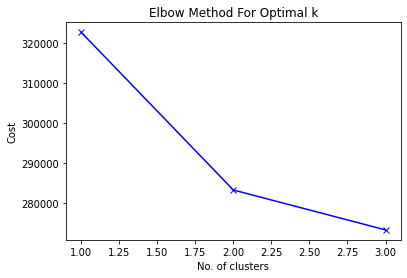

In [ ]:
## Kmodes clustering techinque

# Elbow curve to find optimal K
cost = []
K = range(1,4)
for num_clusters in list(K):
    kmode = KModes(n_clusters=num_clusters, init = "random", n_init = 4, verbose=1)
    kmode.fit_predict(df_main)
    cost.append(kmode.cost_)
    
plt.plot(K, cost, 'bx-')
plt.xlabel('No. of clusters')
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal k')
plt.show()

We now choose K=2 to be as efficient as possible

In [ ]:
# Building the model with 2 clusters
kmode = KModes(n_clusters=2, init = "random", n_init = 4, verbose=1)
clusters = kmode.fit_predict(df_main)
clusters

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 9900, cost: 283409.0
Run 1, iteration: 2/100, moves: 19517, cost: 283141.0
Run 1, iteration: 3/100, moves: 131, cost: 283141.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 244, cost: 284698.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 202, cost: 284894.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 10217, cost: 284934.0
Run 4, iteration: 2/100, moves: 20545, cost: 283170.0
Run 4, iteration: 3/100, moves: 636, cost: 283170.0
Best run was number 1


array([1, 1, 1, ..., 0, 0, 0], dtype=uint16)

In [ ]:
df_main.insert(0, "Cluster", clusters, True)
df_main.head()

,Cluster,energy(kWh/hh),month,day_of_month,weekday,Acorn_grouped
0,1,1354,2,9,2,1
1,1,2204,2,9,2,1
2,1,2234,2,9,2,1
3,1,1654,2,9,2,1
4,1,1205,2,9,2,1


For hierarchical clustering, here is what I will do. I would like to use the grouped values of the data, with the energy portion as I believe those are important and what I want to compare. 

In [ ]:
#knn
# build KNN model and choose n_neighbors = 2
knn = neighbors.KNeighborsClassifier(n_neighbors = 3)
# train the model
knn.fit(X_train, y_train)
# get the predict value from X_test
y_pred = knn.predict(X_test)

knn_accuracy = knn.score(X_test, y_test)
# print the score
print('accuracy: ', knn_accuracy)

stop = timeit.default_timer()
execution_time_knn = stop - start
execution_time_knn

accuracy:  0.7420291110726044


791.7375360610004